# **American Sign Language To Text**

## 1. Import Libraries

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
# Load Data
import os
import cv2
import numpy as np
import json
import gdown

# Data Visualisation
import matplotlib.pyplot as plt
from scipy import interpolate

# Model Training
from sklearn.model_selection import train_test_split

## 2. Downloading Dataset

Downloading Dataset From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ASL-Data.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/O/O_Image_290.jpg  
  inflating: /content/Data/O/O_Image_291.jpg  
  inflating: /content/Data/O/O_Image_292.jpg  
  inflating: /content/Data/O/O_Image_293.jpg  
  inflating: /content/Data/O/O_Image_294.jpg  
  inflating: /content/Data/O/O_Image_295.jpg  
  inflating: /content/Data/O/O_Image_296.jpg  
  inflating: /content/Data/O/O_Image_297.jpg  
  inflating: /content/Data/O/O_Image_298.jpg  
  inflating: /content/Data/O/O_Image_299.jpg  
  inflating: /content/Data/O/O_Image_3.jpg  
  inflating: /content/Data/O/O_Image_30.jpg  
  inflating: /content/Data/O/O_Image_300.jpg  
  inflating: /content/Data/O/O_Image_301.jpg  
  inflating: /content/Data/O/O_Image_302.jpg  
  inflating: /content/Data/O/O_Image_303.jpg  
  inflating: /content/Data/O/O_Image_304.jpg  
  inflating: /content/Data/O/O_Image_305.jpg  
  inflating: /content/Data/O/O_Image_306.jpg  
  inflating: /content/Data/O/O_Image_307.jpg  
  inflating:

## 3. Dataset Loading And Preprocessing

The ASL Dataset contains 28 classes of images, including all the alphabets, delete and space. The data is divided into two folders for test and training purposes. Here, we would use the training data for training and validation purposes. The test data would be used later for model evaluation.

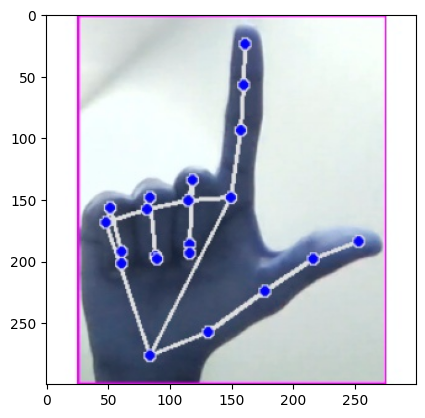

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualizing one image
temp_img = cv2.imread('Data/L/L_Image_1.jpg')
plt.imshow(temp_img)
plt.show()
plt.figure()

In [ ]:
def load_data(train_dir):
    images = []
    labels = []
    index = -1
    dir_list = os.listdir(train_dir)
    for i in range(len(dir_list)):
        index +=1
        print(f'Fetching images of "{dir_list[i]}".')
        for image in os.listdir(train_dir + "/" + dir_list[i]):
            temp_img = cv2.imread(train_dir + '/' + dir_list[i] + '/' + image)
            temp_img = np.array(temp_img)
            images.append(temp_img)
            labels.append(index)
    labels = tf.keras.utils.to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)

    return x_train, x_test, y_train, y_test

train_dir = 'Data/'
x_train, x_test, y_train, y_test = load_data(train_dir)

Fetching images of "A".
Fetching images of "del".
Fetching images of "T".
Fetching images of "G".
Fetching images of "O".
Fetching images of "F".
Fetching images of "E".
Fetching images of "Q".
Fetching images of "L".
Fetching images of "H".
Fetching images of "K".
Fetching images of "C".
Fetching images of "space".
Fetching images of "X".
Fetching images of "D".
Fetching images of "P".
Fetching images of "I".
Fetching images of "U".
Fetching images of "R".
Fetching images of "J".
Fetching images of "V".
Fetching images of "S".
Fetching images of "Z".
Fetching images of "N".
Fetching images of "B".
Fetching images of "W".
Fetching images of "M".
Fetching images of "Y".


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
print("Data Shapes:")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Data Shapes:
(10080, 300, 300, 3) (1120, 300, 300, 3) (10080, 28) (1120, 28)


## 4. Data Visualisation

Before preprocessing, let us load one sample image from each class.

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'del', 'space']

<Figure size 640x480 with 0 Axes>

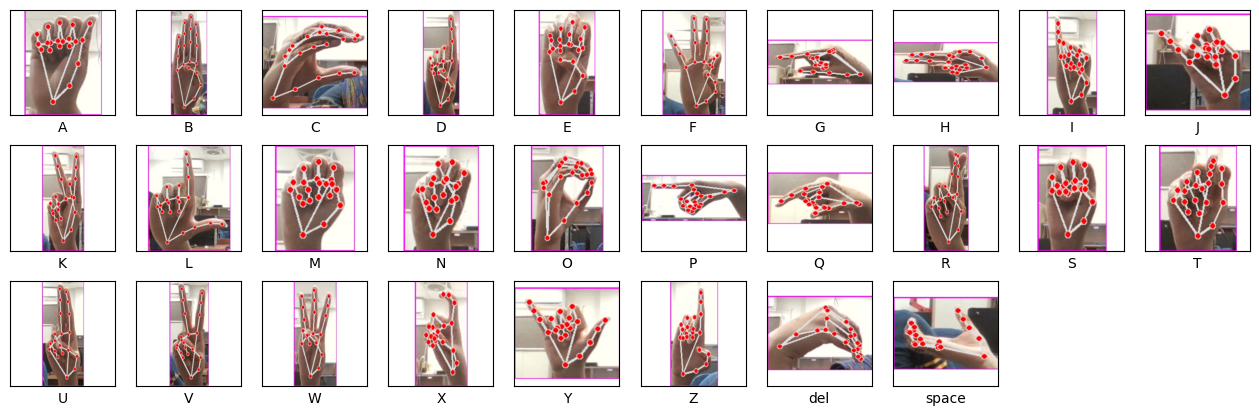

In [ ]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,28):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "{0}/{0}_Image_150.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])

plot_sample_images()

Each letter correspond to its signed language equivalent

## 5. Define CNN Model
<div id="4">
</div>

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])


The CNN model is trained with the images which are classified to 28 classes (A-Z , space, delete). The CNN model contains total 12 layers. The layers comprises of five convolution layers, three maxpooling layer, one flatten layer & followed by three fully connected layer(dense). For optimizing the model “Adam” optimizer is used and the model is trained for 5 epochs.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

## 6. Train Model

In [ ]:
history = model.fit(
      x_train,y_train,
      epochs=5,
      validation_data = (x_test,y_test))

Epoch 1/5
315/315 [==============================] - 47s 97ms/step - loss: 3.1433 - accuracy: 0.8337 - val_loss: 0.0105 - val_accuracy: 0.9964
Epoch 2/5
315/315 [==============================] - 30s 95ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 8.2820e-04 - val_accuracy: 1.0000
Epoch 3/5
315/315 [==============================] - 30s 95ms/step - loss: 3.3594e-04 - accuracy: 0.9999 - val_loss: 1.9975e-06 - val_accuracy: 1.0000
Epoch 4/5
315/315 [==============================] - 31s 97ms/step - loss: 7.6371e-07 - accuracy: 1.0000 - val_loss: 4.4320e-07 - val_accuracy: 1.0000
Epoch 5/5
315/315 [==============================] - 30s 96ms/step - loss: 2.7495e-07 - accuracy: 1.0000 - val_loss: 2.3703e-07 - val_accuracy: 1.0000


## 7. Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

35/35 [==============================] - 2s 32ms/step - loss: 2.3703e-07 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 2.3703435658717353e-07


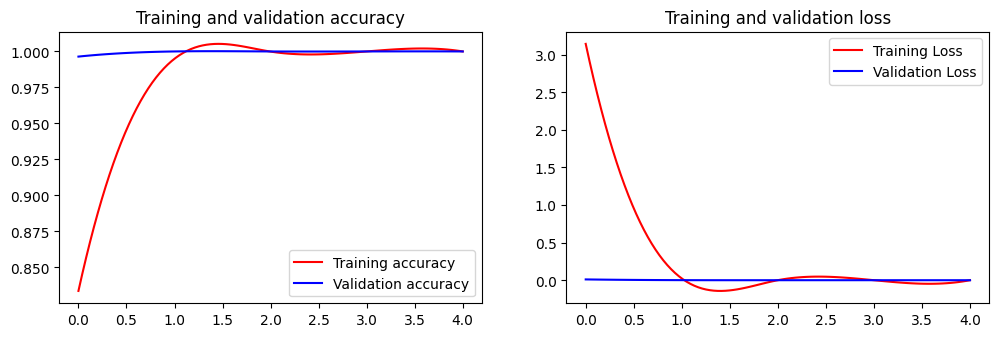

In [ ]:
def plot_results(model):
  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  x_new = np.linspace(0, 4, 100)
  a_BSpline = interpolate.make_interp_spline(epochs,acc)
  y_new = a_BSpline(x_new)
  plt.plot(x_new,y_new,'r', label='Training accuracy' )
  a_BSpline2 = interpolate.make_interp_spline(epochs,val_acc)
  y_new2 = a_BSpline2(x_new)
  plt.plot(x_new,y_new2,'b', label='Validation accuracy' )
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(3, 2, 2)
  a_BSpline3 = interpolate.make_interp_spline(epochs,loss)
  y_new3 = a_BSpline3(x_new)
  plt.plot(x_new,y_new3,'r', label='Training Loss' )
  a_BSpline4 = interpolate.make_interp_spline(epochs,val_loss)
  y_new4 = a_BSpline4(x_new)
  plt.plot(x_new,y_new4,'b', label='Validation Loss' )
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

plot_results(model)

## 8. Save Model

In [ ]:
model.save('Fyp-ASL.h5')

## 9. Load Model

In [ ]:
new_model = tf.keras.models.load_model('Fyp-ASL.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0